# audio track lengths for birdclef-2023

Let's take a look at how long these tracks are.

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

from birdclef.utils import get_spark
from pyspark.sql import functions as F

spark = get_spark()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/20 01:44:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/20 01:44:44 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/03/20 01:44:44 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
df = spark.read.parquet(
    "gs://birdclef-2023/data/processed/birdclef-2023/train_durations_v2.parquet"
)
df.show(n=5)

+--------------------+------------------+
|            filename|          duration|
+--------------------+------------------+
|abethr1/XC128013.ogg| 45.60979591836735|
|abethr1/XC363501.ogg|18.677596371882085|
|abethr1/XC363502.ogg| 38.76575963718821|
|abethr1/XC363503.ogg|29.257188208616782|
|abethr1/XC363504.ogg| 42.34453514739229|
+--------------------+------------------+
only showing top 5 rows



In [5]:
df.summary().show()

+-------+--------------------+------------------+
|summary|            filename|          duration|
+-------+--------------------+------------------+
|  count|               16941|             16941|
|   mean|                null| 40.88558617402471|
| stddev|                null| 69.61028594350307|
|    min|abethr1/XC128013.ogg|0.5480272108843537|
|    25%|                null|12.773877551020409|
|    50%|                null| 24.60734693877551|
|    75%|                null| 45.87106575963719|
|    max|yewgre1/XC753190.ogg|2373.5280272108844|
+-------+--------------------+------------------+



In [12]:
df.select(F.sum("duration") / 3600).show()

+----------------------+
|(sum(duration) / 3600)|
+----------------------+
|    192.40075427059796|
+----------------------+



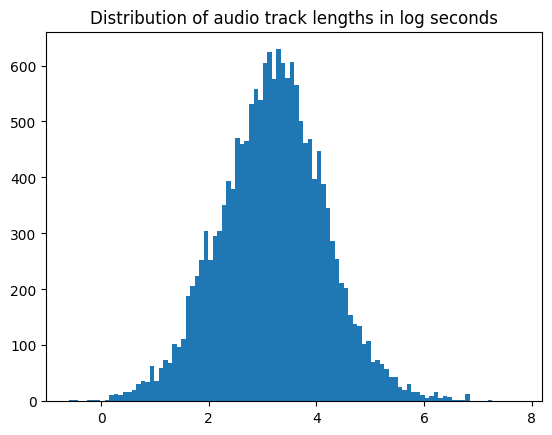

In [9]:
import matplotlib.pyplot as plt
import numpy as np

durations = df.select("duration").toPandas().duration
plt.title("Distribution of audio track lengths in log seconds")
plt.hist(np.log(durations), bins=100)
plt.show()